In [25]:
%matplotlib inline

In [26]:
import warnings
warnings.filterwarnings('ignore')


## Project title: Financial Inclusion in Africa

<img src='UNUZ4zR - Imgur.jpg' width=1000/>

Goal : predict which individuals are most likely to have or use a bank account. <br/>
Dataset source : Zindi 



Project Structure  : <br/>
1. Importing the dataset 
2. EDA 
3. Data visualization 
4. Data preprocessing 
5. Splitting the data into train and test
6. Model Selection + Training
7. Hyperparameter Tuning 
8. Model evaluation 
9. Conclusions and insights 


Step 1: Importing the dataset 


In [27]:
import pandas as pd
df=pd.read_csv('Financial_inclusion_dataset.csv')
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


Step 2 : EDA 

- The size of this dataset 

In [28]:
print(f'This dataset has {df.shape[0]} rows--> Instances  and {df.shape[1]} columns--> Features  ')

This dataset has 23524 rows--> Instances  and 13 columns--> Features  


- first five instance of this dataset

In [29]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


- Some information about this dataset 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [31]:
t=list(df.dtypes.values)
print('The majority of the features are of type', *set([i for i in t if t.count(i)==max(t.count(j) for j in t) ]))

The majority of the features are of type object


- Some statistic about numerical features 

In [32]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


- Generating ydata_profiling report

In [33]:
from ydata_profiling import ProfileReport
p=ProfileReport(df)
p.to_file('report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 45.10it/s]


**Observations concluded from Profile Report :** <br/>
**Missing values :** <br/>
There are no missing cells . <br/>
**High correlations :** <br/>
-country is highly overall correlated with year .<br/>
-gender_of_respondent is highly overall correlated with relationship_with_head .<br/>
**Duplicated rows  :** <br/>
There are no duplicated rows .<br/>

Step 3 : Data visulization 

- Number of people having bank accounts per country 

In [34]:
df['bank_account']=df['bank_account'].map({'Yes':1,'No':0})
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,0,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,0,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,0,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [35]:
import plotly.express as px 

data=df.groupby('country')['bank_account'].count().reset_index()
fig=px.bar(data,x='country',y='bank_account',title='Count of people with bank accounts per country ',color='country',template='plotly_dark')
fig.show()

> The country with the most number of people with accounts is **Rwanda** . <br/>
  The country with the least number of people with accounts is **Urganda** . 

 - Number of people with bank accounts per year 

In [36]:
df['year'] = df['year'].astype(str)#to avoid plotly interpreting the values as float 
data=df.groupby('year')['bank_account'].count().reset_index()
fig=px.bar(data,x='year',y='bank_account',title='Count of people with bank accounts per year ',color='year',template='plotly_dark')
fig.show()
df['year']=df['year'].astype(int)

> number of people with bank_accounts in **2016** > number of people with bank_accounts in **2018** > number of people with bank_accounts in **2017**

- Number of people with bank accounts in various locations 

In [37]:
data=df.groupby('location_type')['bank_account'].count().reset_index()
fig=px.bar(data,x='location_type',y='bank_account',title='Count of people with bank accounts per location_type ',color='location_type',template='plotly_dark')
fig.show()


> Number of people with bank accounts in the **rural** is **greater** than in the **urban** .

- Correlation matrix

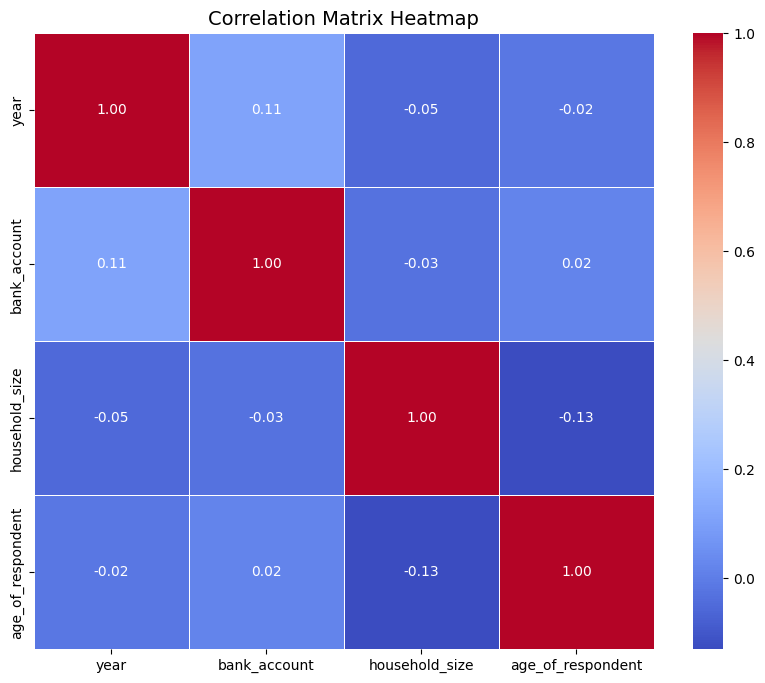

In [38]:
import seaborn as sns 
import matplotlib.pyplot as plt 
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.show()


Step 4 : Data preprocessing 

From the profile generated by **ydata_profiling** we have conducted that there are no missing values nor duplicates so handling them won't be part of this step . <br/>
We are going to deal with are handling outliers and encoding categorical values .

- Handling outliers 

In [39]:
q1={}
q3={}
outliers={}
for i in df.columns :
  if df[i].dtype in ['float64','int64']:
    q1[i]=df[i].quantile(0.25)
    q3[i]=df[i].quantile(0.75)
    iqr=q3[i]-q1[i]
    outliers[i]=df[(df[i]>=q3[i]+iqr*1.5)|(df[i]<=q1[i]-1.5*iqr)]
    print(f'The percentage of outliers in {i} columns is {len(outliers[i])*100/len(df):.2f}%')


The percentage of outliers in year columns is 0.00%
The percentage of outliers in bank_account columns is 100.00%
The percentage of outliers in household_size columns is 1.62%
The percentage of outliers in age_of_respondent columns is 1.02%


> outliers that are going to be removed are in household_size and age_of_respondent .

- Deleting outliers 

In [40]:
for i in ['household_size', 'age_of_respondent']:
    df = df[~df[i].isin(outliers[i].index)]

- Encoding categorical variables (using label encoder to avoid high cardinality)

In [41]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for i in filter(lambda x: df[x].dtype == 'object', df.columns):
    df[i] = l.fit_transform(df[i])
df
        

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,0,1,0,1,3,24,0,5,2,3,9
1,0,2018,1111,0,0,0,5,70,0,1,4,0,4
2,0,2018,2222,1,1,1,5,26,1,3,3,5,9
3,0,2018,3333,0,0,1,5,34,0,1,2,2,3
4,0,2018,4444,0,1,0,8,26,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2018,1239,0,0,1,4,48,0,1,0,0,7
23520,3,2018,1240,0,0,1,2,27,0,1,3,3,7
23521,3,2018,1241,0,0,1,5,27,0,4,4,2,7
23522,3,2018,1242,0,1,1,7,30,0,4,0,3,9


Step 5: Splitting the data 

In [42]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['bank_account','uniqueid'])#deleted bank_account because it represents the target feature and uniqueid because it doens't have any effect on the target 
y=df['bank_account']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


Step 6: Model Selection + Training 

In [43]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pandas as pd
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVC": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    results.append({"Model": name, "Accuracy": acc, "F1 Score": f1})

df_results = pd.DataFrame(results)
print(df_results.sort_values(by="F1 Score", ascending=False))

                 Model  Accuracy  F1 Score
3              XGBoost  0.889267  0.499520
2        Random Forest  0.866738  0.447577
0  Logistic Regression  0.879277  0.341067
1                  SVC  0.863549  0.000000


> According To the comparaison between the models that we did the one we are going to choose is XGBoost with the highest accuracy 88.9% and the highest f1_score (2*(precision*recall)/precision+recall) 0.499

Step 7 : Hyperparameter Tuning 

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}
grid_xgb = GridSearchCV(models['XGBoost'], param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_xgb.fit(x_train, y_train)
y_pred=grid_xgb.predict(x_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


Step 8: Model evaluation 

- Confusion Matrix

[]

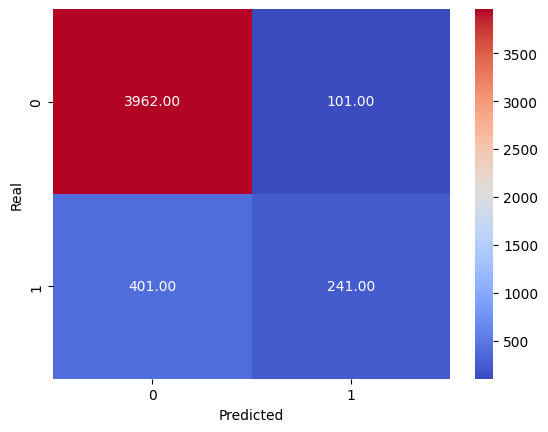

In [48]:
conf_matrix=pd.crosstab(y_test,y_pred,rownames=['Real'],colnames=['Predicted'])
plt.Figure(figsize=(6,4))
sns.heatmap(conf_matrix,cmap='coolwarm',fmt='.2f',annot=True)
plt.plot()

In [49]:
print(f'model\'s accuracy {accuracy_score(y_test,y_pred)*100:.2f}%')
print(f'model\'s f1_score {f1_score(y_test,y_pred):.2f}')

model's accuracy 89.33%
model's f1_score 0.49


Overall model's accuracy is 89% which is quite high . However from the confusion matrix we may conduct that the model is failing to classify correctly elements of the class  1 (number of FP = 401>>number of TP = 241 )

Trying to recover from this problem

In [52]:
print(y.value_counts(normalize=True))

bank_account
0    0.859208
1    0.140792
Name: proportion, dtype: float64


Now it is clear that this problem is due to imbalances in the dataset values .

- Solution : adding class imbalance ratio to the xgb classifier parameters 

In [85]:
p=y.value_counts(normalize=True)
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
best_params = grid_xgb.best_params_
best_params['scale_pos_weight'] = scale_pos_weight*0.5 #added *0.5 to manipulate trade off between global accuracy and class prediction (for class 1 ) accuracy
xgb_weighted = XGBClassifier(**best_params)
xgb_weighted.fit(x_train, y_train)
y_pred_weighted = xgb_weighted.predict(x_test)


- Revaluating model 

[]

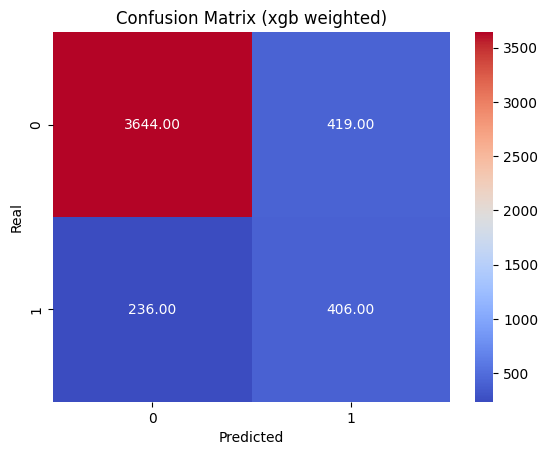

In [83]:
conf_matrix=pd.crosstab(y_test,y_pred_weighted,rownames=['Real'],colnames=['Predicted'])
plt.Figure(figsize=(6,4))
plt.title('Confusion Matrix (xgb weighted)')
sns.heatmap(conf_matrix,cmap='coolwarm',fmt='.2f',annot=True)
plt.plot()


In [84]:
print(f'model\'s accuracy {accuracy_score(y_test,y_pred_weighted)*100:.2f}%')
print(f'model\'s f1_score {f1_score(y_test,y_pred_weighted):.2f}')

model's accuracy 86.08%
model's f1_score 0.55


- Conclusions and insights : <br/> 
 Through this machine learning pipeline we have cleaned the dataset explored it , manipulated it and trained a model to predict whether a person in Africa is likely to have a bank account . The result is a weighted xgb model with an overall **accuracy** of **86%** and an **f1_score** of **0.55** .   

Registering Model for streamlit application 

In [89]:
import pickle
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_weighted, f)